# Tutorial 2

This contains my attempt at tutorial 1.

This tutorial is based on a lecture about Bayesian statistics.

# Libraries

In [67]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# setting styles

plt.style.use('ggplot')

# Generate a gaussian function

In [6]:
def gaussian(x, mu = 0, sigma = 1):
    g = 1/(np.sqrt(2*np.pi)* sigma) * np.exp(-1/2 * np.power((x-mu)/sigma,2))
    return g

In [7]:
# sanity check
gaussian(1, sigma = 0.5)

0.10798193302637613

# Probability distributions

Answer: $p(x/\omega_1)$ and $p(x/\omega_2)$ represent the probabilities of observing an image of length $x$ given that the image is of a crack / no crack respectively.

In [9]:
x = np.linspace(-10,20,200)

px_w1 = gaussian(x, 2, 1.5) + gaussian(x, 7, 0.5)
px_w2 = gaussian(x, 8, 2.5) + gaussian(x, 3.5, 1)

# scale
# np.trapz integrates the function that are given using the trapezoid integration method

# as of right now, let's see what they integrate to:

print(np.trapz(px_w1, x))
print(np.trapz(px_w2, x))

# both of then integrate to two..
# if we divide all the points by the integral, then the resulting integral must integrate to one!

px_w1 /= np.trapz(px_w1,x)
px_w2 /= np.trapz(px_w2,x)

1.9999999999999993
1.9999992009167862


In [11]:
print(np.trapz(px_w1, x))
print(np.trapz(px_w2, x))

# we can see the results, we can also see that because of computation, one of them has not rounded perfectly

1.0
1.0000000000000002


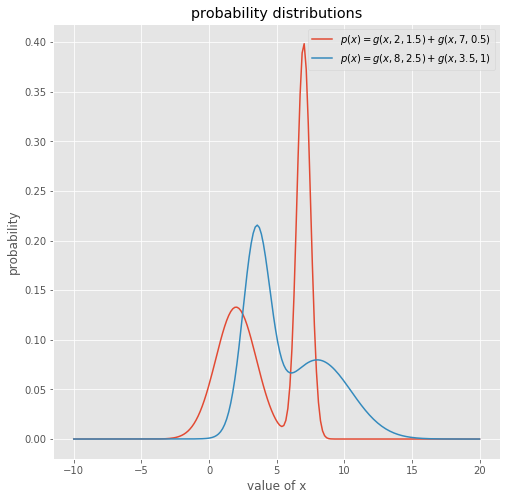

In [20]:
fig, ax = plt.subplots(figsize = (8,8))

plt.plot(x, px_w1)
plt.plot(x, px_w2)

plt.title('probability distributions')
plt.ylabel('probability')
plt.xlabel('value of x')
plt.legend([
    '$p(x) = g(x, 2, 1.5) + g(x, 7, 0.5)$',
    '$p(x) = g(x, 8, 2.5) + g(x, 3.5, 1)$'
])

# Determine the Posterior distribution

Recall that the posterio distribution is the following:

$$p(\omega_i, x)$$

Asssuming that, $p(\omega_1) = p(\omega_2) = 0.5$

In [45]:
# using Bayes theorem...

def calculate_posterior(likelihood, prior, evidence = None):
    n = len(likelihood)
    evidence = [1 for i in range(n)] if not evidence else evidence
    posterior = []
    for i in range(n):
        posterior.append(likelihood[i] * prior[i] * evidence[i])

    return posterior



[1, 1]


(-3, 15)

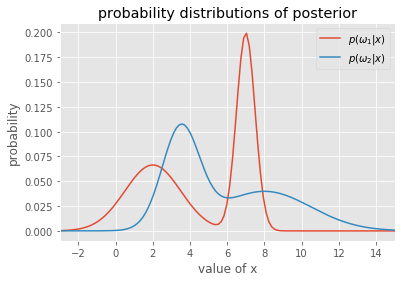

In [57]:
pw1_x, pw2_x = calculate_posterior([px_w1, px_w2], [0.5, 0.5])

plt.plot(x,pw1_x)
plt.plot(x, pw2_x)

plt.title('probability distributions of posterior')
plt.ylabel('probability')
plt.xlabel('value of x')
plt.legend([
    '$p(\omega_1|x)$',
    '$p(\omega_2|x)$'
])
plt.xlim([-3,15])

[1, 1]


(-3, 15)

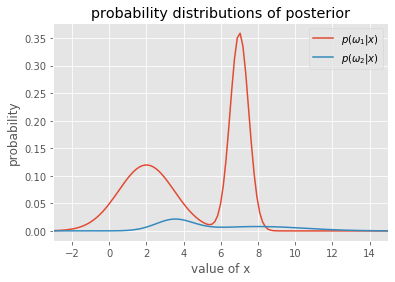

In [58]:
pw1_x, pw2_x = calculate_posterior([px_w1, px_w2], [0.9, 0.1])

plt.plot(x,pw1_x)
plt.plot(x, pw2_x)

plt.title('probability distributions of posterior')
plt.ylabel('probability')
plt.xlabel('value of x')
plt.legend([
    '$p(\omega_1|x)$',
    '$p(\omega_2|x)$'
])
plt.xlim([-3,15])

# Classification with Bayes

In [66]:
X,y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [69]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

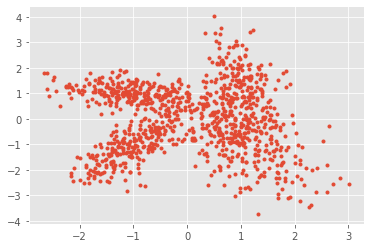

In [72]:
plt.plot(X[:,0],X[:,1],'.')

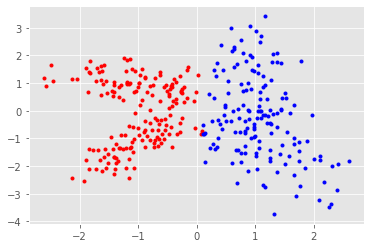

In [96]:
yhat = model.predict(X_test)
plt.plot(X_test[yhat ==0 ,0], X_test[yhat ==0 ,1],'r.')
plt.plot(X_test[yhat ==1 ,0],X_test[yhat ==1 ,1],'b.')

# it seems like the classification has worked, let's see what Huthwaite is asking us to do

In [77]:
# from tutorial 1, we learnt how to create an Xgrid...
x1_line = np.linspace(-3,3, 200)
x2_line = np.linspace(-3,3, 200)
x1_grid, x2_grid = np.meshgrid(x1_line, x2_line)
X_grid = np.array([x1_grid, x2_grid]).reshape(2, 40000).T

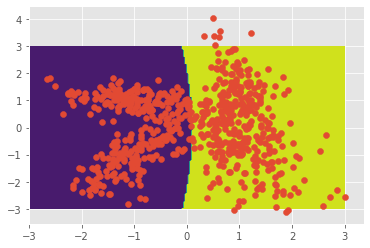

In [95]:
classVals = model.predict(X_grid)
classVals = clsssVals.reshape(-200,200)
plt.contourf(x1_line, x2_line, classVals)

plt.scatter(X_train[:,0], X_train[:,1])

# Evaluate the model

In [104]:
true_false = yhat == y_test

print(sum(true_false)/len(true_false))

# Huthwaite method
n = len(yhat)
nMatch = 0
for i in range(n):
    nMatch += 1 if yhat[i] == y_test[i] else 0
print(nMatch/n)
        

0.9545454545454546
0.9545454545454546


# plotting image probability

In [125]:
y_image = model.predict_proba(X_grid) # note, we've used X_grid here or plotting purposes ONLY
y_image[0:5]

# this returns 2 columns (each corresponding to a class, i.e. a 0 or a 1!)

array([[9.99999995e-01, 4.69343675e-09],
       [9.99999994e-01, 5.92429890e-09],
       [9.99999993e-01, 7.47248589e-09],
       [9.99999991e-01, 9.41836236e-09],
       [9.99999988e-01, 1.18622709e-08]])

In [126]:
# what we can then do is plot this data on a contour plot, so:

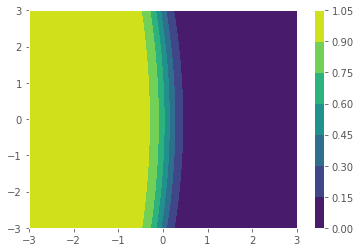

In [130]:
Z = y_image[:,0].reshape(-200,200) # only plotting probabilities for class 0!
plt.contourf(x1_line, x2_line, Z)
plt.colorbar()